In [808]:
#####################################################################
############### Part I - Importing
#####################################################################

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [809]:
df = pd.read_csv('911.csv')

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [811]:
###############################################################
############### Part II - Duplicates
###############################################################

In [812]:
df[df.duplicated()]                      #### no duplicates found, good for us

,lat,lng,desc,zip,title,timeStamp,twp,addr,e


In [813]:
##############################################################
################## Part III - Missing Data
##############################################################

Text(0.5, 1.0, 'Missing Data Heatmap')

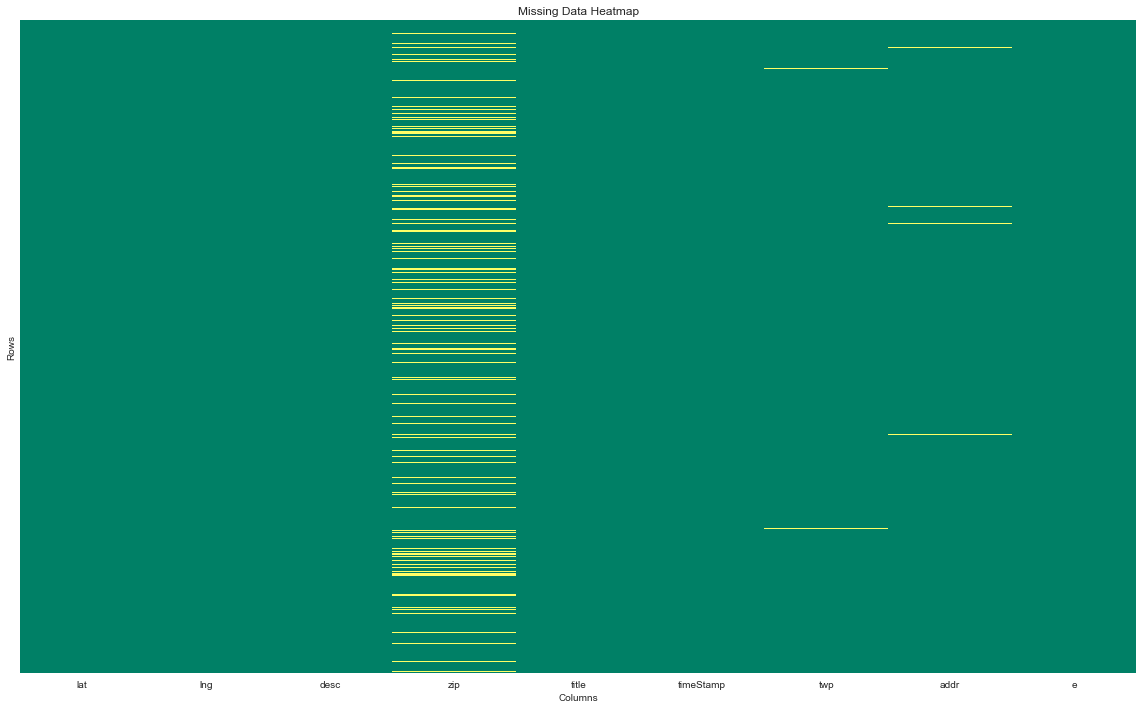

In [820]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### we have missing values inside 3 columns, seems like twp and address has very few missing values so in that case we can drop those few values
#### for zip we will have to find a way to make it work

In [821]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [822]:
df.isna().any()

lat          False
lng          False
desc         False
zip           True
title        False
timeStamp    False
twp           True
addr          True
e            False
dtype: bool

In [823]:
df[df.twp.isnull()].count()                #### so we have 43 empty rows in twp, we will drop them because compared to our data which has almost 100,000 rows
                                           #### it wouldn't effect our data much

lat          43
lng          43
desc         43
zip          14
title        43
timeStamp    43
twp           0
addr         31
e            43
dtype: int64

In [824]:
df.dropna(subset=['twp'],inplace=True)

In [825]:
df.isna().any()

lat          False
lng          False
desc         False
zip           True
title        False
timeStamp    False
twp          False
addr          True
e            False
dtype: bool

In [826]:
df[df.twp.isnull()].count()         #### took care of the null values inside twp

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

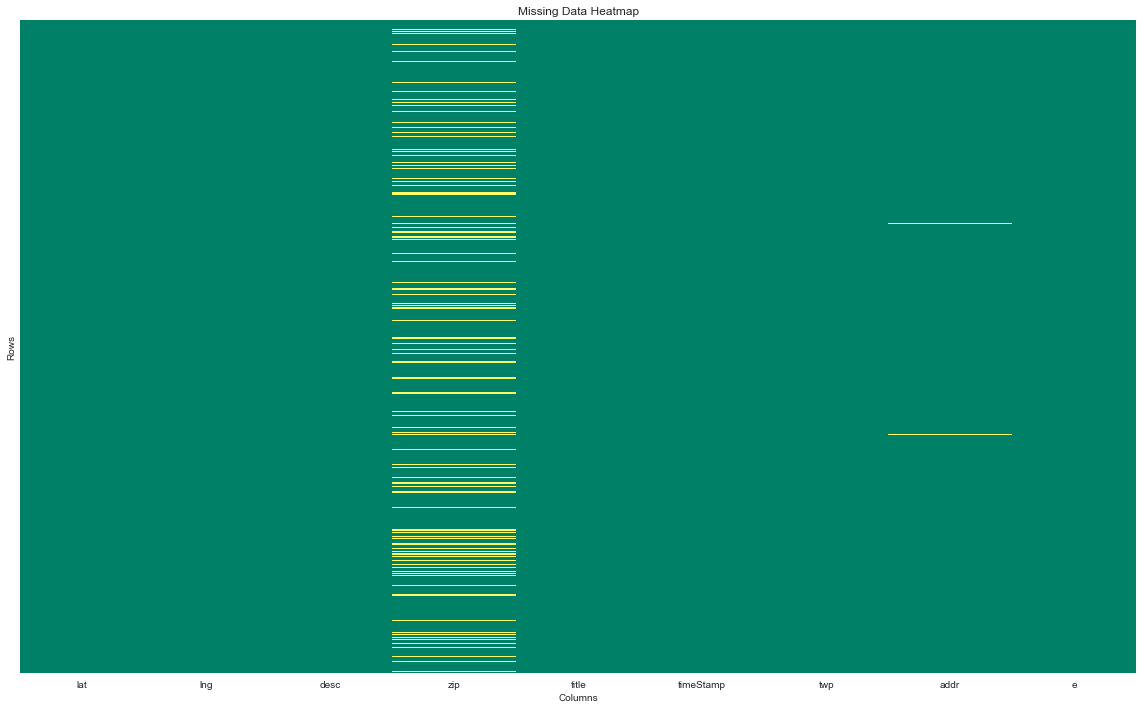

In [827]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### now lets take care of addr missing values

In [828]:
df[df.addr.isnull()]                #### i initially had intended to drop these null values but because its more then 500 rows its better to put a placeholder instead

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
33,40.297876,-75.581294,; NEW HANOVER; 2015-12-10 @ 18:20:28;,19525.0,Traffic: DISABLED VEHICLE -,2015-12-10 18:22:01,NEW HANOVER,NaN,1
34,40.081260,-75.137025,; CHELTENHAM; 2015-12-10 @ 18:20:28;,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:26:02,CHELTENHAM,NaN,1
121,40.097222,-75.376195,; UPPER MERION; 2015-12-11 @ 01:15:42;,NaN,Traffic: DISABLED VEHICLE -,2015-12-11 01:17:02,UPPER MERION,NaN,1
323,40.256213,-75.463788,; SCHWENKSVILLE; 2015-12-11 @ 15:30:40;,19473.0,Traffic: DISABLED VEHICLE -,2015-12-11 15:32:02,SCHWENKSVILLE,NaN,1
325,40.222882,-75.398789,; SKIPPACK; 2015-12-11 @ 15:30:40;,NaN,Traffic: DISABLED VEHICLE -,2015-12-11 15:36:01,SKIPPACK,NaN,1
...,...,...,...,...,...,...,...,...,...
98866,40.178442,-75.128506,; HORSHAM; 2016-08-22 @ 20:11:37;,NaN,Traffic: VEHICLE ACCIDENT -,2016-08-22 20:16:02,HORSHAM,NaN,1
98867,40.178442,-75.128506,; HORSHAM; 2016-08-22 @ 20:15:22;,NaN,Traffic: VEHICLE ACCIDENT -,2016-08-22 20:16:02,HORSHAM,NaN,1
98918,40.229008,-75.387852,; HATFIELD BORO; 2016-08-22 @ 23:40:49;,NaN,Traffic: DISABLED VEHICLE -,2016-08-22 23:42:01,HATFIELD BORO,NaN,1
99031,40.119255,-75.236238,; WHITEMARSH; 2016-08-23 @ 09:55:57;,NaN,Traffic: VEHICLE ACCIDENT -,2016-08-23 09:57:02,WHITEMARSH,NaN,1


In [829]:
df.addr.fillna('Unknown',inplace=True)

In [830]:
df[df.addr.isnull()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e


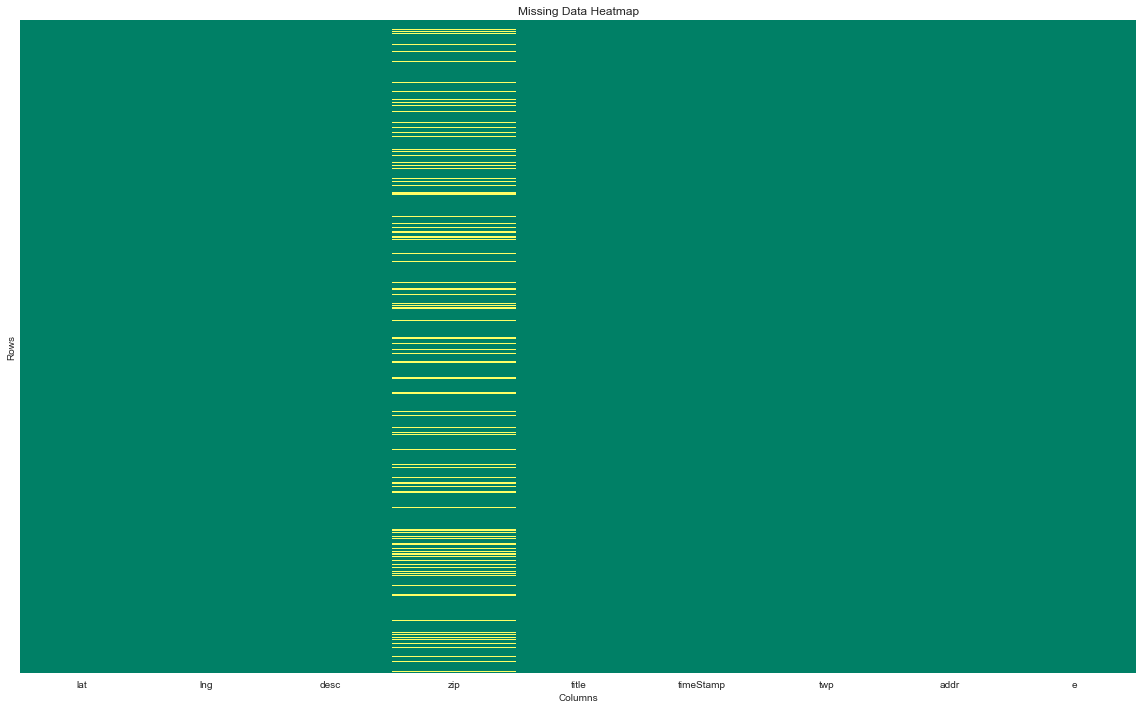

In [831]:
fig, ax = plt.subplots(figsize=(20,12))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


#### took care of addr column now we will move towards zip column

In [832]:
df[df.zip.isna()]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
10,40.231990,-75.251891,RT202 PKWY & KNAPP RD; MONTGOMERY; 2015-12-10 ...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,MONTGOMERY,RT202 PKWY & KNAPP RD,1
14,40.097222,-75.376195,SCHUYLKILL EXPY & CROTON RD UNDERPASS; UPPER M...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:02,UPPER MERION,SCHUYLKILL EXPY & CROTON RD UNDERPASS,1
23,40.143326,-75.422819,RT422 & PAWLINGS RD OVERPASS; LOWER PROVIDENC...,NaN,Traffic: DISABLED VEHICLE -,2015-12-10 18:02:02,LOWER PROVIDENCE,RT422 & PAWLINGS RD OVERPASS,1
24,40.153268,-75.189558,SUMMIT AVE & RT309 UNDERPASS; UPPER DUBLIN; 20...,NaN,Traffic: VEHICLE ACCIDENT -,2015-12-10 18:02:02,UPPER DUBLIN,SUMMIT AVE & RT309 UNDERPASS,1
...,...,...,...,...,...,...,...,...,...
99459,40.233713,-75.463603,HIGHLAND MANOR DR & DEAD END; PERKIOMEN; Stat...,NaN,EMS: FALL VICTIM,2016-08-24 09:27:01,PERKIOMEN,HIGHLAND MANOR DR & DEAD END,1
99479,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: CARDIAC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1
99480,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIABETIC EMERGENCY,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1
99481,40.221227,-75.288737,SUMNEYTOWN PIKE & RR OVERPASS; UPPER GWYNEDD;...,NaN,EMS: DIZZINESS,2016-08-24 10:52:01,UPPER GWYNEDD,SUMNEYTOWN PIKE & RR OVERPASS,1


In [833]:
df.zip.isna().sum()                 #### number of null values in zip, can't drop obviously so we will use the placeholder here same way we did for addr feature column

12826

In [834]:
mean_zip = df.zip.mean()           #### because zip is numerical we can take advantage of mean and replace null values with them

mean_zip

19237.685556953697

In [835]:
df.zip.fillna(mean_zip,inplace=True)

In [836]:
df.info()                       #### nothing is empty now or missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99449 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99449 non-null  float64
 1   lng        99449 non-null  float64
 2   desc       99449 non-null  object 
 3   zip        99449 non-null  float64
 4   title      99449 non-null  object 
 5   timeStamp  99449 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       99449 non-null  object 
 8   e          99449 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 7.6+ MB


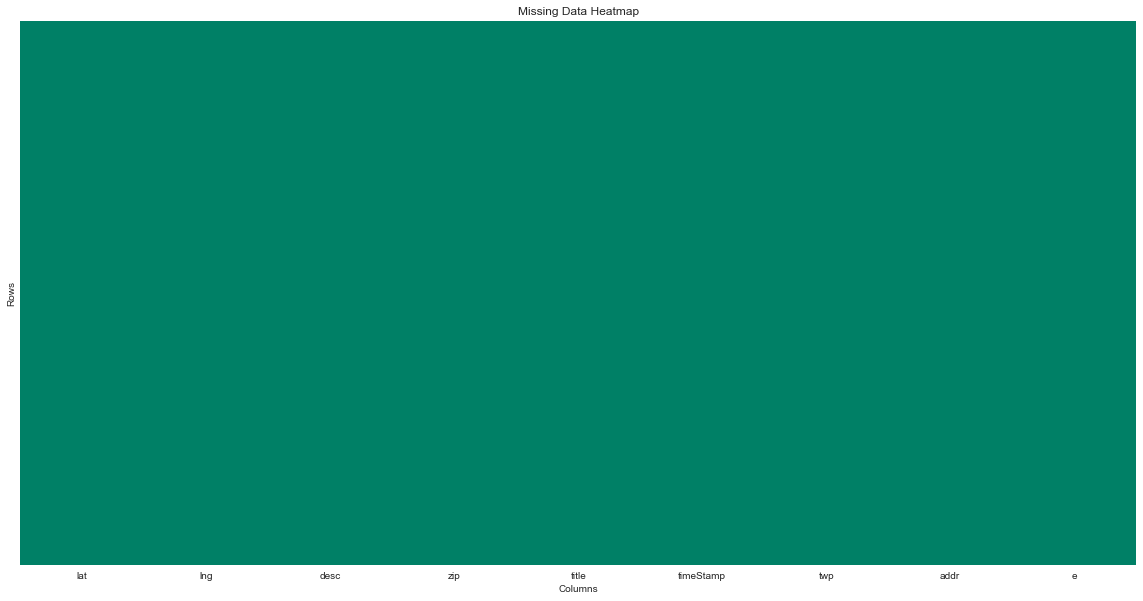

In [837]:
fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer',ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


#### seems like our data is now clean

In [663]:
####################################################################
######################### Part IV - Feature Engineering
####################################################################

In [838]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19237.685557,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [839]:
df.zip.head()         #### lets round zip column

0    19525.000000
1    19446.000000
2    19401.000000
3    19401.000000
4    19237.685557
Name: zip, dtype: float64

In [840]:
df.zip.round()

0        19525.0
1        19446.0
2        19401.0
3        19401.0
4        19238.0
          ...   
99487    19401.0
99488    19003.0
99489    19401.0
99490    19002.0
99491    19446.0
Name: zip, Length: 99449, dtype: float64

In [841]:
df.zip = df.zip.round()

In [842]:
df.zip.head()

0    19525.0
1    19446.0
2    19401.0
3    19401.0
4    19238.0
Name: zip, dtype: float64

In [843]:
df.title.nunique()        #### number of unique titles

110

In [844]:
df.title[0]               #### we will make a new column which extracts the reason from title column

'EMS: BACK PAINS/INJURY'

In [845]:
x = df.title[0]

In [846]:
x.split(':')

['EMS', ' BACK PAINS/INJURY']

In [847]:
x.split(':')[0]

'EMS'

In [848]:
df['Reasons'] = df.title.apply(lambda x:x.split(':')[0])             #### making a new column with reasons

In [849]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [850]:
df.Reasons.unique()          #### power of lambda in python, now we have a clear reasons with only 3 categorical values

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [851]:
df.Reasons.nunique()

3

In [852]:
df.Reasons.value_counts()

EMS        48853
Traffic    35693
Fire       14903
Name: Reasons, dtype: int64

In [853]:
df['Num_Reasons'] = df.Reasons.map({'EMS':0,
                                    'Traffic':1,
                                    'Fire':2})

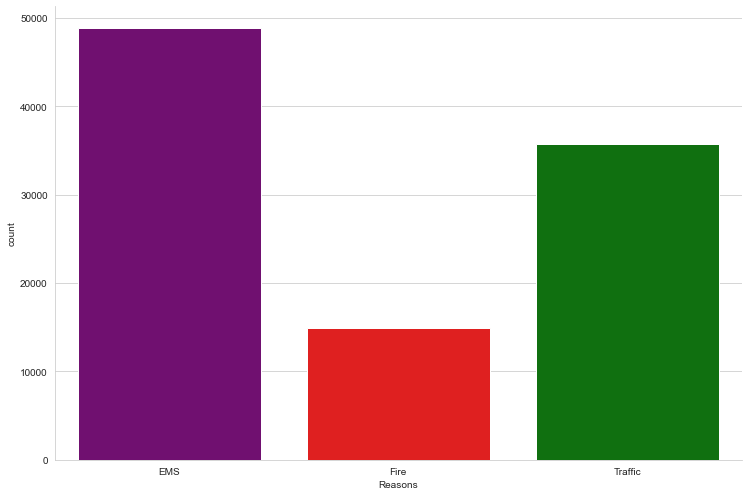

In [854]:
custom = {'EMS':'purple',
          'Fire':'red',
          'Traffic':'green'}

sns.catplot(x='Reasons',data=df,kind='count',height=7,aspect=1.5,palette=custom)



#### majority are EMS related calls

In [855]:
df.Num_Reasons.unique()

array([0, 2, 1], dtype=int64)

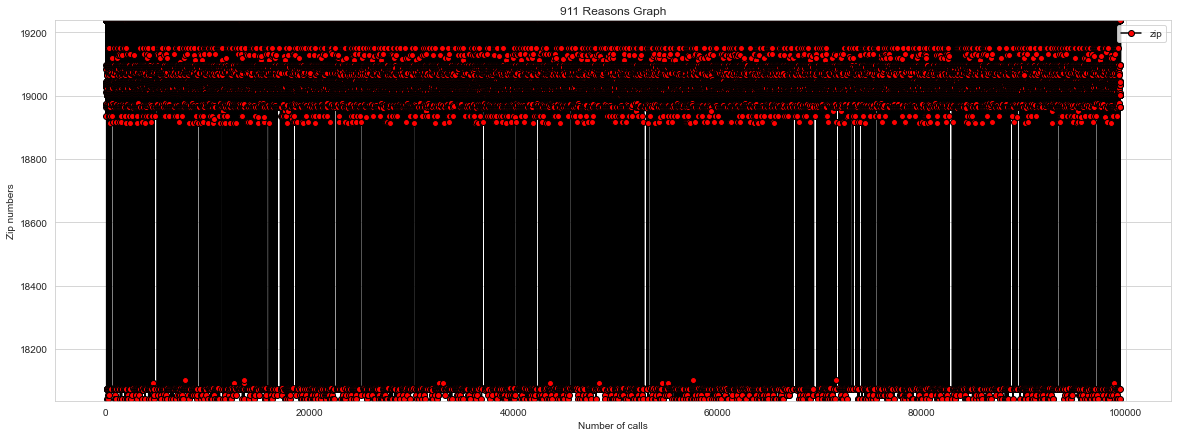

In [856]:
df.zip.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('911 Reasons Graph')

plt.xlabel('Number of calls')

plt.ylabel('Zip numbers')

plt.ylim(df.zip.min(),df.zip.mean())


#### the amount of calls we getting from mean of zip is just astounding, somthing should be wrong in that zip code

In [857]:
df.zip.max()

77316.0

In [858]:
df.zip.min()

18036.0

In [859]:
df[df.zip > 20000]            #### these are total outliers so we will just drop it as they are only 2 values

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Num_Reasons
25715,32.387090,-86.276106,600 ; MONTGOMERY; 2016-02-12 @ 18:44:37;,36107.0,Traffic: DISABLED VEHICLE -,2016-02-12 18:47:01,MONTGOMERY,600,1,Traffic,1
67109,30.333596,-95.595595,8931; MONTGOMERY; Station 311; 2016-06-02 @ 1...,77316.0,EMS: CARDIAC EMERGENCY,2016-06-02 13:36:01,MONTGOMERY,8931,1,EMS,0


In [860]:
df = df[df.zip <= 20000]

In [861]:
df.zip.mean()                     #### mean of zip column

19236.97246774664

In [862]:
df.zip.std()                      #### we have the std of + or - of 322 on either side of z score or std level

259.01984238750345

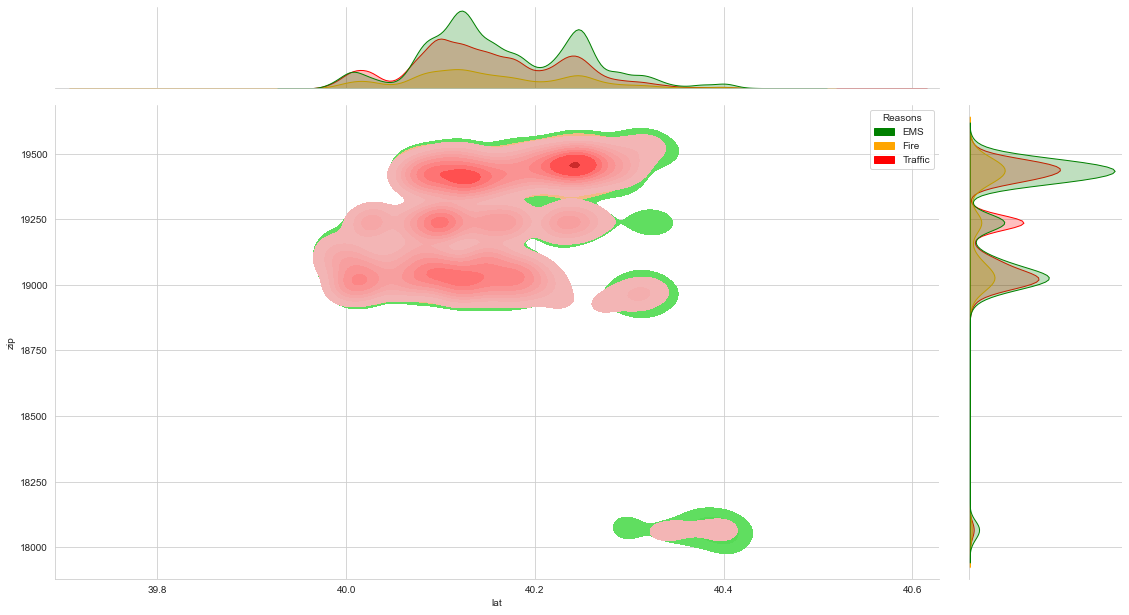

In [863]:
custom = {'Traffic':'red',
          'EMS':'green',
          'Fire':'orange'}

g = sns.jointplot(x='lat',y='zip',data=df,hue='Reasons',kind='kde',fill=True,palette=custom)

g.fig.set_size_inches(17,9)

#### we see one area heavily crowded with traffic calls, may be we can do something with that information to reduce the emergency 911 calls

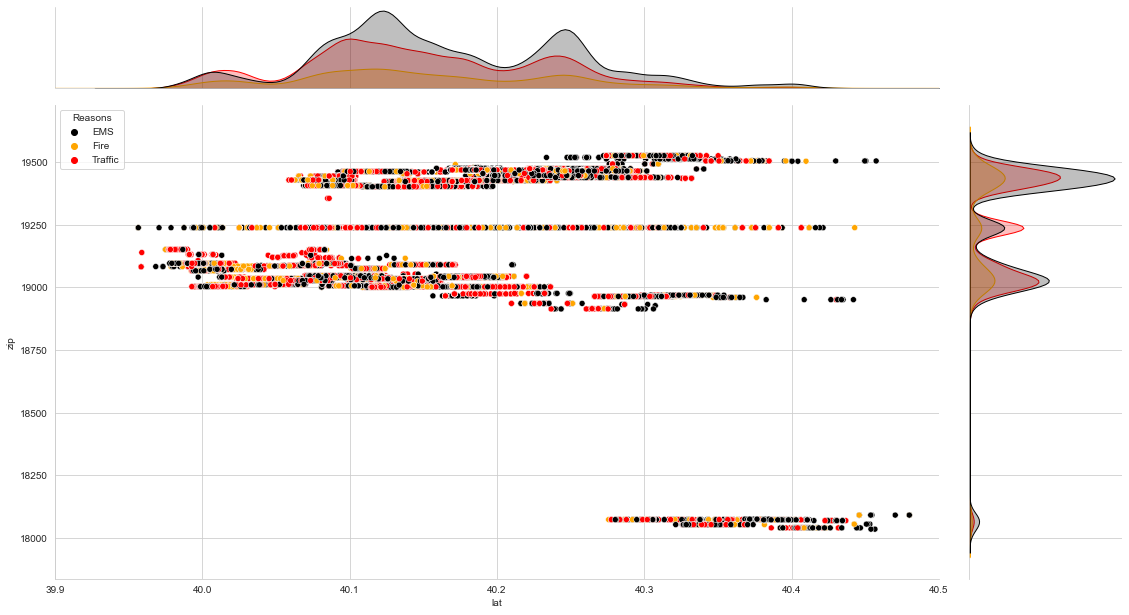

In [864]:
custom = {'Traffic':'red',
          'EMS':'black',
          'Fire':'orange'}

g = sns.jointplot(x='lat',y='zip',data=df,hue='Reasons',palette=custom)

g.ax_joint.set_xlim(39.9, 40.5)

g.fig.set_size_inches(17,9)

#### there a huge peak in zip 19500 and lat 40.1-40.2

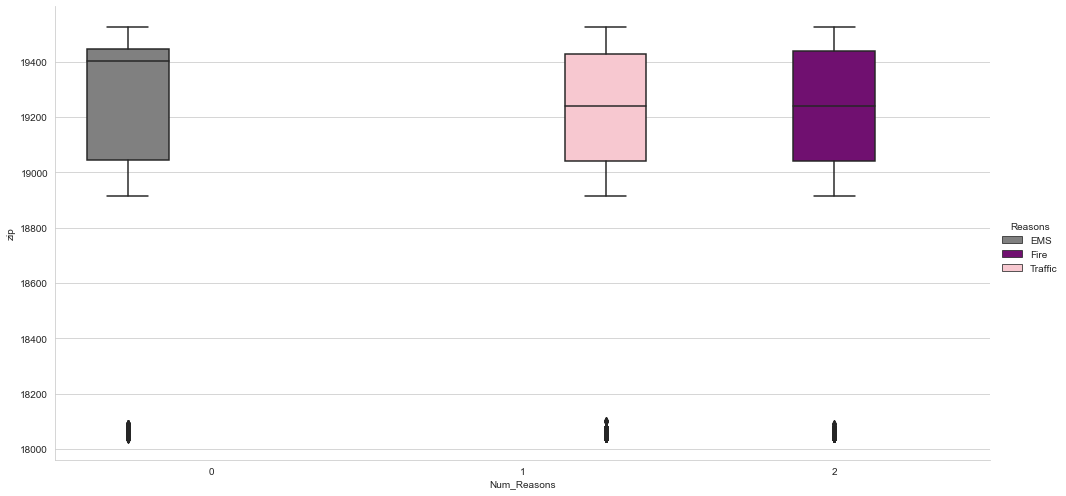

In [865]:
custom = {'Traffic':'pink',
          'EMS':'grey',
          'Fire':'purple'}

sns.catplot(x='Num_Reasons',y='zip',data=df,kind='box',height=7,aspect=2,palette=custom,legend=True,hue='Reasons')


#### theres a pattern to EMS emergency and zip code, same with Fire and Traffic in relation to zip codes

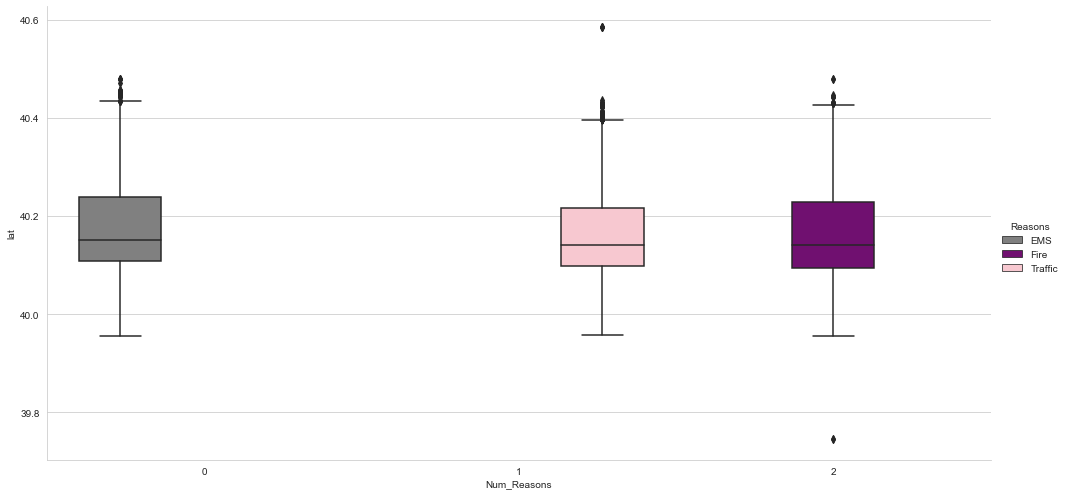

In [866]:
custom = {'Traffic':'pink',
          'EMS':'grey',
          'Fire':'purple'}

sns.catplot(x='Num_Reasons',y='lat',data=df,kind='box',height=7,aspect=2,palette=custom,legend=True,hue='Reasons')


#### same issue with lat here, something is going on with 40.1 lat and all these emergency calls

In [867]:
#################################################################
################ Part V - Normal Distrubution
#################################################################

In [868]:
mean_df = df.zip.mean()
std_df = df.zip.std()

print(mean_df,std_df)

19236.97246774664 259.01984238750345


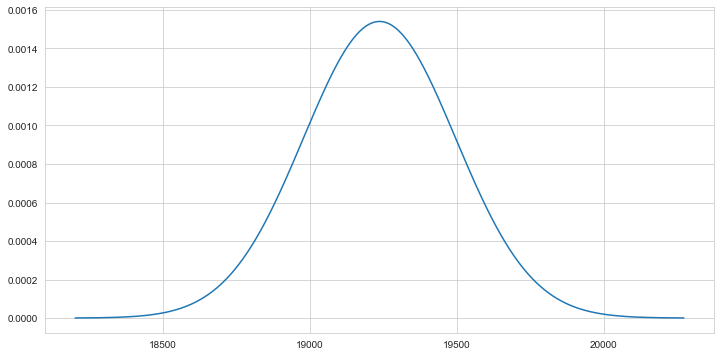

In [869]:
#### now we will make a very nice comprehensive standard deviation graph for zip column
from scipy.stats import norm


x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(12, 6))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')


#### this is very basic one but as we feeling fancy today so we will do a very comprehensive one


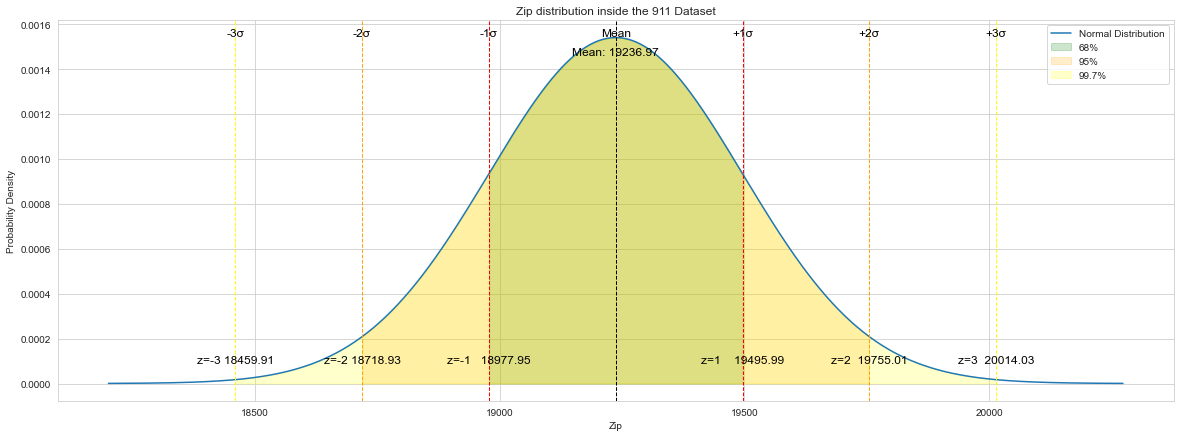

In [870]:
#### Comprehensive time

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='green', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='orange', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='yellow', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Zip distribution inside the 911 Dataset')
plt.xlabel('Zip')
plt.ylabel('Probability Density')

plt.legend()


#### its pretty clear from the normal distribution that zip swings + or - 259 each way, then we have z score + - till 3
#### from this we can look more into those zip codes and see how can we reduce the crime rate or prevent traffics

In [871]:
#############################################################
######### Part VI - Timestamp
#############################################################

In [872]:
#### this will be an eye opener because the things you can do with timestamp will blow your mind and here we will prove it
#### right now its pretty hard to see which days the crimes or emergencies are higher but after using timestamp its going to become very crystal

new_df = df.copy()

new_df['timeStamp'] = pd.to_datetime(new_df['timeStamp'])

In [873]:
df.info()                        #### df is uneffected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99447 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lat          99447 non-null  float64
 1   lng          99447 non-null  float64
 2   desc         99447 non-null  object 
 3   zip          99447 non-null  float64
 4   title        99447 non-null  object 
 5   timeStamp    99447 non-null  object 
 6   twp          99447 non-null  object 
 7   addr         99447 non-null  object 
 8   e            99447 non-null  int64  
 9   Reasons      99447 non-null  object 
 10  Num_Reasons  99447 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 11.1+ MB


In [874]:
new_df.info()           #### now we have made the time column into date time so its going to be easier to manage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99447 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99447 non-null  float64       
 1   lng          99447 non-null  float64       
 2   desc         99447 non-null  object        
 3   zip          99447 non-null  float64       
 4   title        99447 non-null  object        
 5   timeStamp    99447 non-null  datetime64[ns]
 6   twp          99447 non-null  object        
 7   addr         99447 non-null  object        
 8   e            99447 non-null  int64         
 9   Reasons      99447 non-null  object        
 10  Num_Reasons  99447 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 11.1+ MB


In [875]:
x = new_df.timeStamp[0]           #### now because we have converted to timestamp, we have a lot of flexibilities
x

Timestamp('2015-12-10 17:40:00')

In [876]:
x.hour

17

In [877]:
x.minute                        #### we can call by individual attributes of timestamp, amazing

40

In [878]:
new_df.timeStamp.head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [879]:
x.month

12

In [880]:
x.date()

datetime.date(2015, 12, 10)

In [881]:
x.year

2015

In [882]:
x.dayofweek

3

In [883]:
#### making a new column called hour based on the timestamp column
#### ignore the warning, as its recommended to use .loc but you can use either methods and I find this one much better 

new_df['hour'] = new_df['timeStamp'].apply(lambda x:x.hour)

In [884]:
new_df['month'] = new_df.timeStamp.apply(lambda x:x.month)

In [885]:
new_df['day_of_week'] = new_df.timeStamp.apply(lambda x:x.dayofweek)

In [886]:
new_df['month_name'] = new_df.month.map({1:'Jan',
                         2:'Feb',
                         3:'Mar',
                         4:'Apr',
                         5:'May',
                         6:'Jun',
                         7:'Jul',
                         8:'Aug',
                         9:'Sep',
                         10:'Oct',
                         11:'Nov',
                         12:'Dec'})

In [887]:
new_df.month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [888]:
new_df.month_name.unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'],
      dtype=object)

In [889]:
new_df['Day'] = new_df.day_of_week.map({0:'Mon',
                                     1:'Tue',
                                     2:'Wed',
                                     3:'Thr',
                                     4:'Fri',
                                     5:'Sat',
                                     6:'Sun'})

In [890]:
new_df.head()                       #### we got our month, day of the week and hour columns from timestamp

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Num_Reasons,hour,month,day_of_week,month_name,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,0,17,12,3,Dec,Thr
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,0,17,12,3,Dec,Thr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2,17,12,3,Dec,Thr
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,0,17,12,3,Dec,Thr
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,0,17,12,3,Dec,Thr


In [891]:
new_df.day_of_week.unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [892]:
new_df.Day.unique()

array(['Thr', 'Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed'], dtype=object)

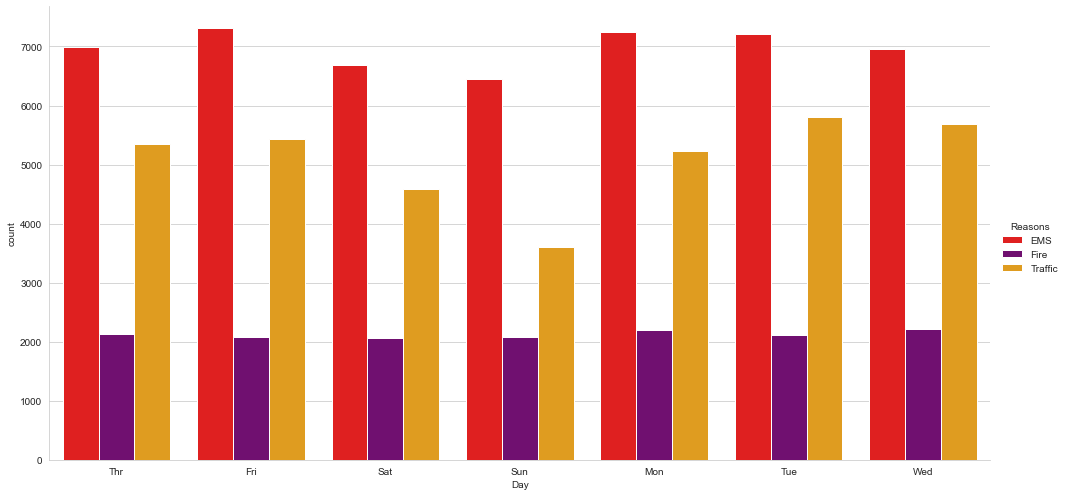

In [893]:
custom = {'Traffic':'orange',
          'EMS':'red',
          'Fire':'purple'}


sns.catplot(x='Day',data=new_df,kind='count',hue='Reasons',height=7,aspect=2,palette=custom)


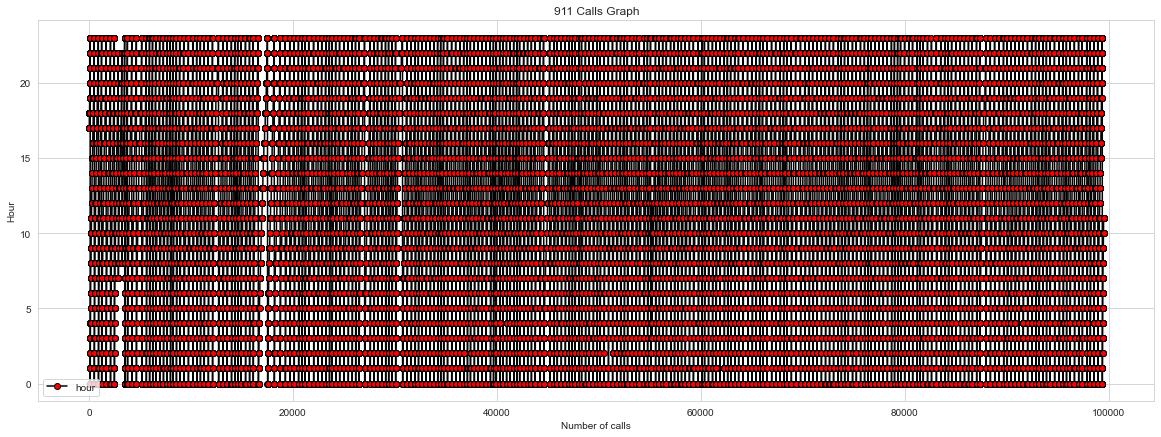

In [894]:
new_df.hour.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('911 Calls Graph')

plt.xlabel('Number of calls')

plt.ylabel('Hour')


#### if we see closely then we see theres a dark black line running across hours 10-15, it means we get most of the calls in that hour

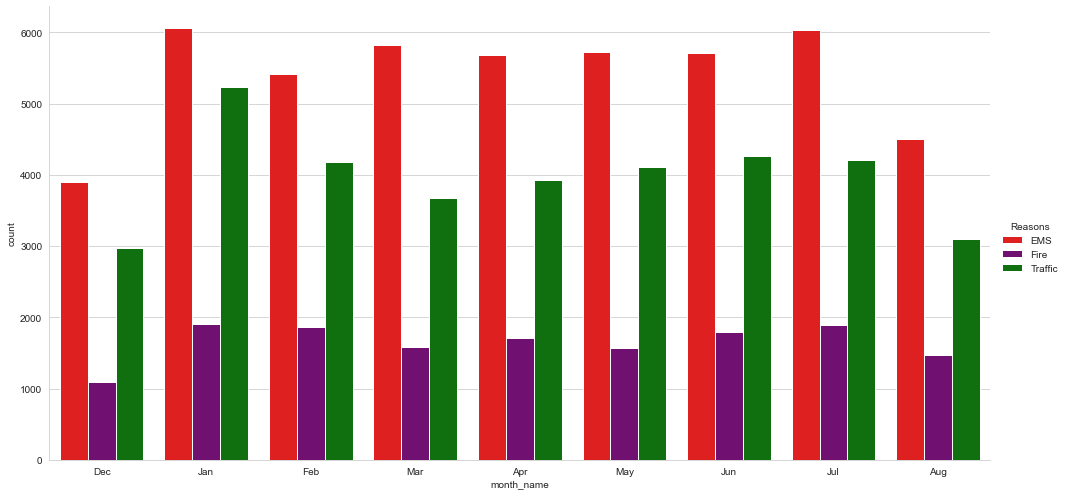

In [895]:
custom = {'EMS':'red',
          'Fire':'purple',
          'Traffic':'green'}

sns.catplot(x='month_name',data=new_df,kind='count',hue='Reasons',height=7,aspect=2,palette=custom)


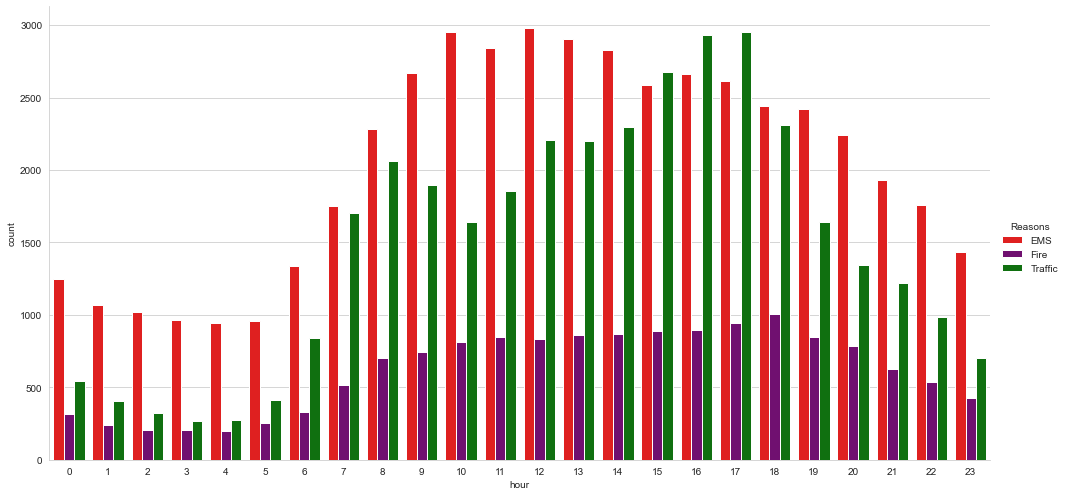

In [896]:
custom = {'EMS':'red',
          'Fire':'purple',
          'Traffic':'green'}

sns.catplot(x='hour',data=new_df,kind='count',hue='Reasons',height=7,aspect=2,palette=custom)


#### this is something finally showing some kinda pattern, the crimes or emergency situations are low when its the morning time
#### and yes it makes sense because usually most of the people are sleeping

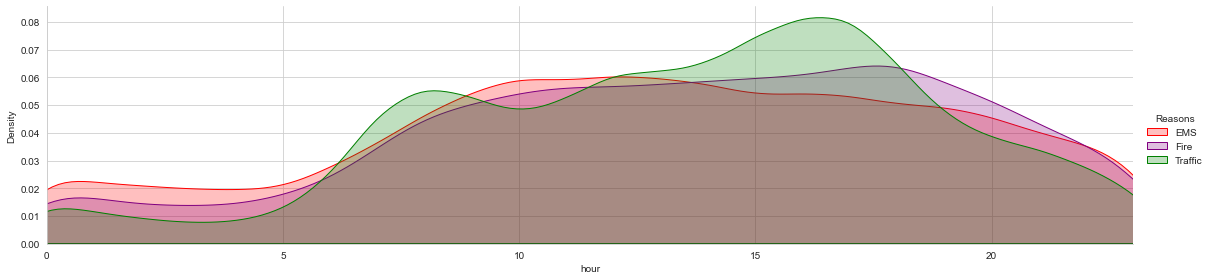

In [897]:

pl = sns.FacetGrid(new_df,hue='Reasons',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'hour',fill=True)

pl.set(xlim=(0,new_df.hour.max()))

pl.add_legend()

#### hour 0-5 less calls, then 15-18 hour we see a peak in traffic related calls which makes sense because thats the time people are leaving their offices

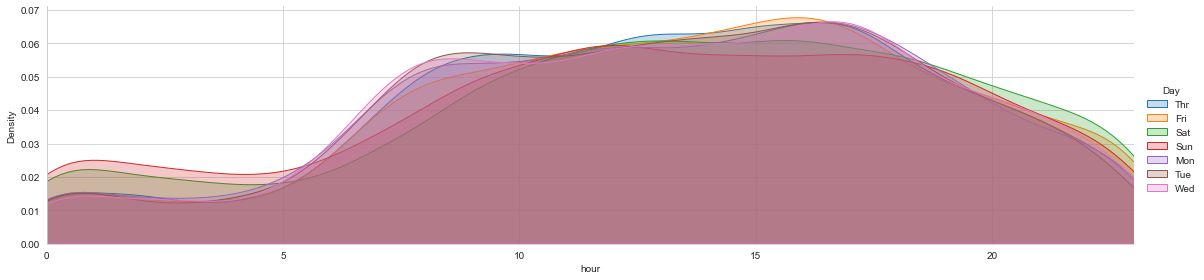

In [898]:
pl = sns.FacetGrid(new_df,hue='Day',aspect=4,height=4)

pl.map(sns.kdeplot,'hour',fill=True)

pl.set(xlim=(0,new_df.hour.max()))

pl.add_legend()


#### seems like the calls on weekends are higher even during hours 0-5 which makes sense its weekend


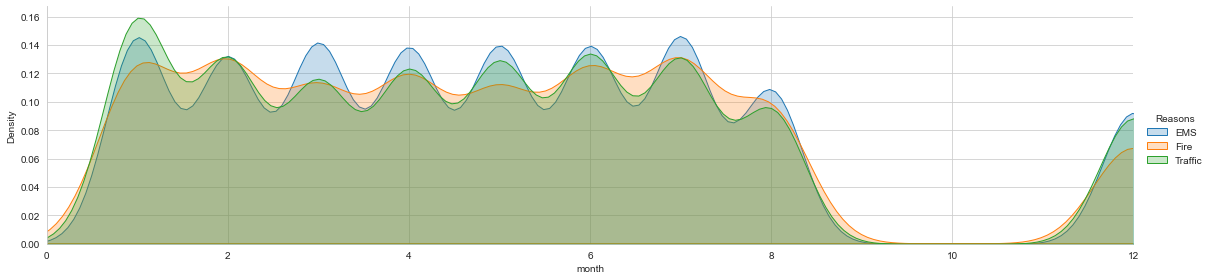

In [899]:
pl = sns.FacetGrid(new_df,hue='Reasons',aspect=4,height=4)

pl.map(sns.kdeplot,'month',fill=True)

pl.set(xlim=(0,new_df.month.max()))

pl.add_legend()


#### pretty revealing that the number of calls increases for Traffic during Jan-Feb then regresses to the mean
#### also we dont have the data for month 9-11 so that's why we see everything going down to zero

In [900]:
new_df.month.unique()                           #### no month 9,10,11

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [901]:
new_df.drop(columns='e',inplace=True)

In [902]:
new_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Num_Reasons,hour,month,day_of_week,month_name,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,0,17,12,3,Dec,Thr
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,0,17,12,3,Dec,Thr
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,2,17,12,3,Dec,Thr
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,0,17,12,3,Dec,Thr
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,0,17,12,3,Dec,Thr


In [903]:
#### lets make a quick basic corr heatmap to see the relatioship

corr = new_df.corr()

In [904]:
corr.head()

,lat,lng,zip,Num_Reasons,hour,month,day_of_week
lat,1.000000,-0.451421,-0.002225,-0.070098,-0.002584,-0.012174,0.013860
lng,-0.451421,1.000000,-0.334003,0.037806,-0.007206,0.011991,-0.029848
zip,-0.002225,-0.334003,1.000000,-0.032479,0.007605,-0.006511,0.006819
Num_Reasons,-0.070098,0.037806,-0.032479,1.000000,0.053674,-0.008354,-0.009802
hour,-0.002584,-0.007206,0.007605,0.053674,1.000000,0.017922,-0.004773


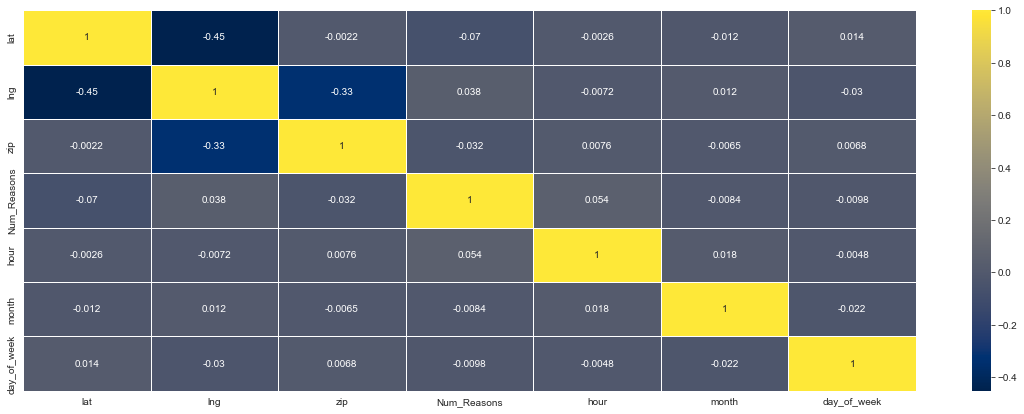

In [905]:
fig, ax = plt.subplots(figsize=(20,7)) 

sns.heatmap(corr,annot=True,linewidths=0.5,ax=ax,cmap='cividis')


#### honestly from this we can't deduce any strong correlation which makes sense but there is very weak positive correlation to Reasons and hour as well as lng

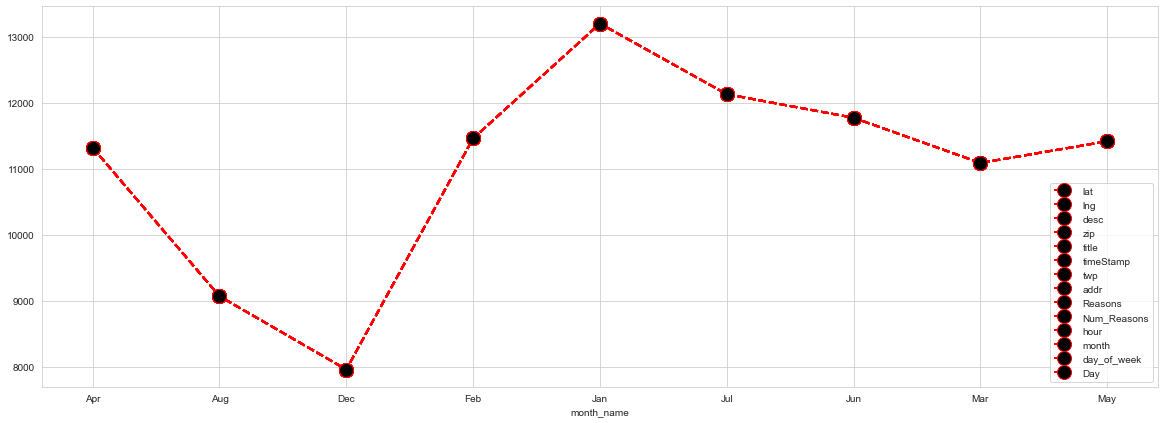

In [906]:
new_df.groupby('month_name').count().plot(legend=True,figsize=(20,7),marker='o',markersize=14,markerfacecolor='black',linestyle='dashed',linewidth=2,color='red')


#### we can use the groupby to our advantage and see this very informative plot
#### seems like th calls are the highest during the first month of year Jan followed by summer month July

In [907]:
new_df.month_name = new_df.month_name.astype('category')

In [908]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99447 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99447 non-null  float64       
 1   lng          99447 non-null  float64       
 2   desc         99447 non-null  object        
 3   zip          99447 non-null  float64       
 4   title        99447 non-null  object        
 5   timeStamp    99447 non-null  datetime64[ns]
 6   twp          99447 non-null  object        
 7   addr         99447 non-null  object        
 8   Reasons      99447 non-null  object        
 9   Num_Reasons  99447 non-null  int64         
 10  hour         99447 non-null  int64         
 11  month        99447 non-null  int64         
 12  day_of_week  99447 non-null  int64         
 13  month_name   99447 non-null  category      
 14  Day          99447 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(

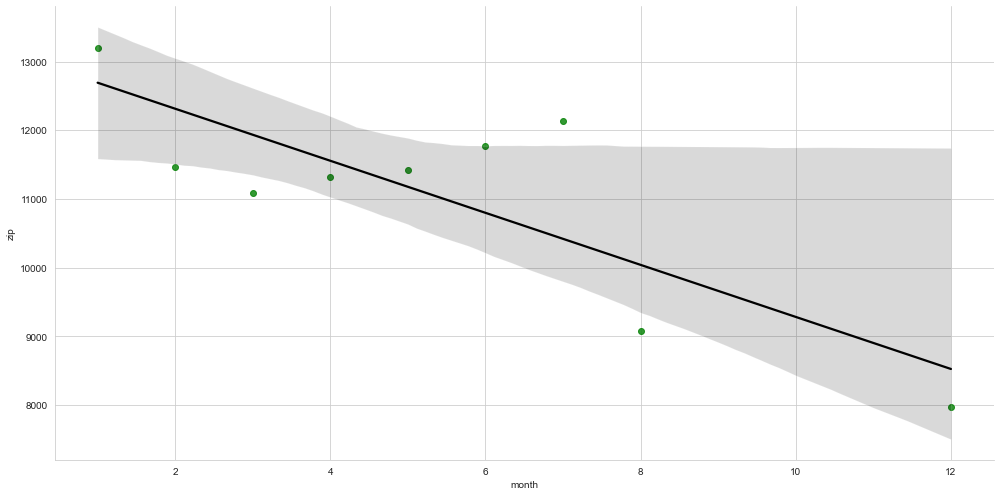

In [910]:


sns.lmplot(x='month',y='zip',data=new_df.groupby('month').count().reset_index(),height=7,aspect=2,line_kws={'color':'black'},scatter_kws={'color':'green'})


#### we see some linear relationship

In [911]:
new_df['Date'] = new_df.timeStamp.apply(lambda x:x.date())

In [912]:
new_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Num_Reasons,hour,month,day_of_week,month_name,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,0,17,12,3,Dec,Thr,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,0,17,12,3,Dec,Thr,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,2,17,12,3,Dec,Thr,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,0,17,12,3,Dec,Thr,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,0,17,12,3,Dec,Thr,2015-12-10


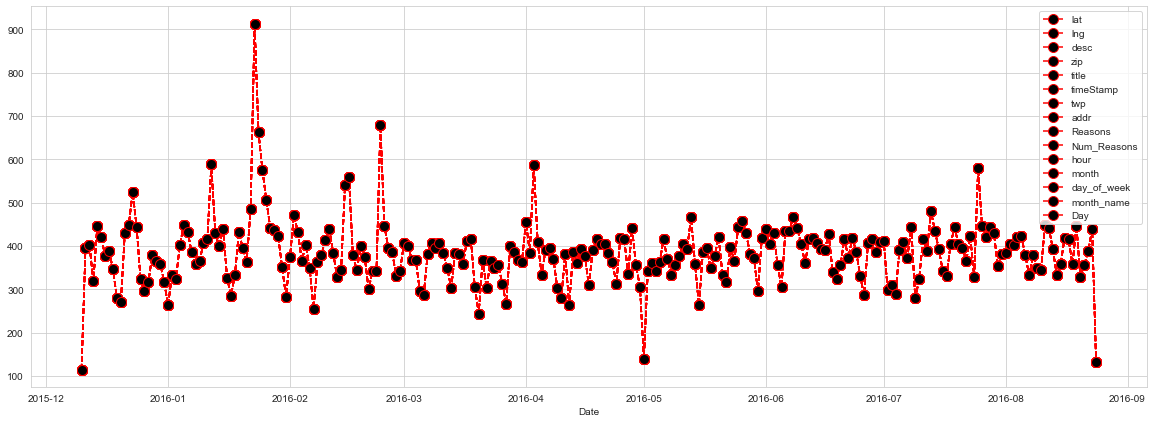

In [913]:
new_df.groupby('Date').count().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=10,linestyle='dashed',color='red')


#### same we see here as before, month Jan has the higest density of calls

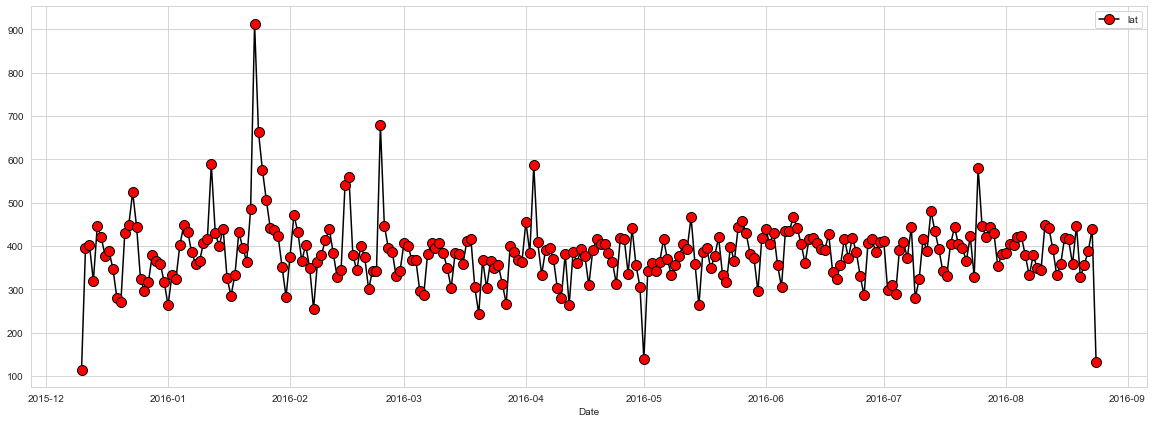

In [914]:
new_df.groupby('Date').count()['lat'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)


#### samething but we just selected lat from the groupby 

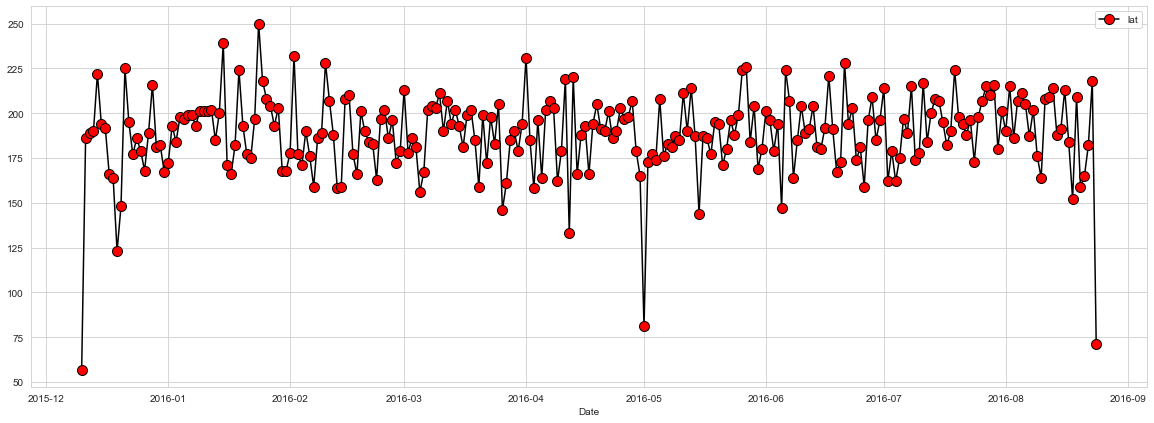

In [915]:
new_df[new_df.Reasons == 'EMS'].groupby('Date').count()['lat'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)


#### we see that EMS related calls are at the peak during Jan-Feb months and is lowest in month 5

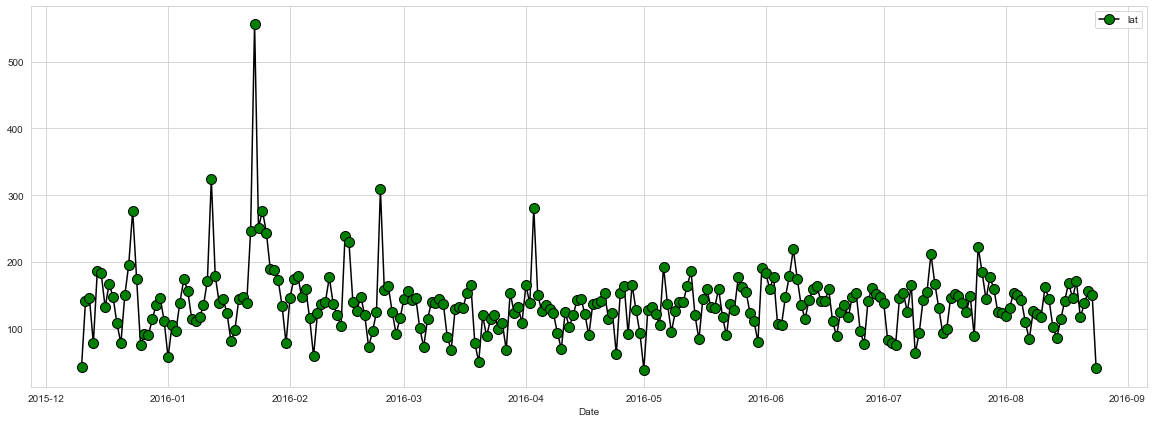

In [916]:
new_df[new_df.Reasons == 'Traffic'].groupby('Date').count()['lat'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black',markersize=10)


#### traffic calls are highest during new year month Jan and then declines substantially and is lowest during month 5

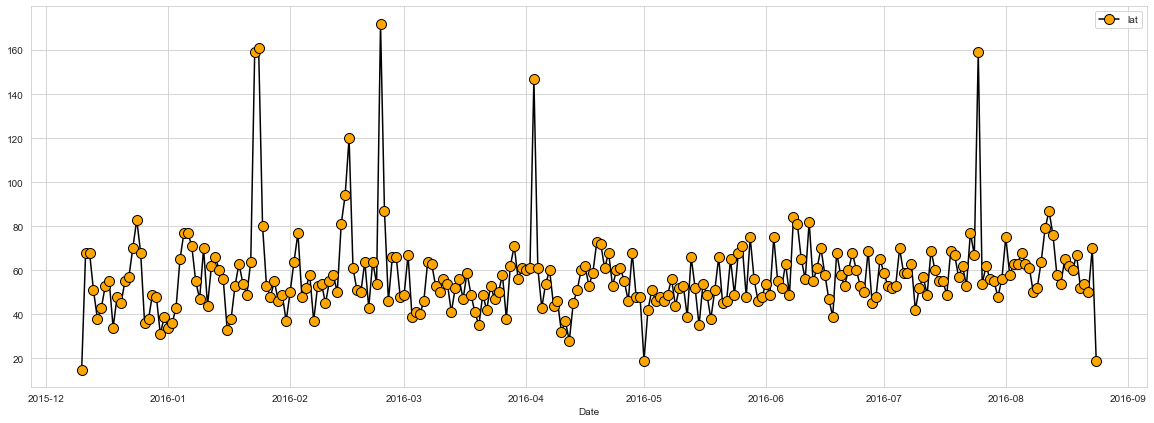

In [917]:
new_df[new_df.Reasons == 'Fire'].groupby('Date').count()['lat'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='orange',color='black',markersize=10)


#### its the least calls compared to traffic and EMS but still peaks in month 1-3 and lowest in month 5

In [918]:
new_df.groupby(by=['day_of_week','hour']).count()['Reasons'].unstack()          #### we use unstack to make into matrix form like here, we could have done with pivot table too but I love this approach

#### we did something very interesting here, we just are interested in Reasons so we grouped by Reasons and hour and day of the week and then unstack to form a matrix

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
1,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
2,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,818,696,667,558,514,474
5,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
6,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330


In [919]:
heat = new_df.groupby(by=['day_of_week','hour']).count()['Reasons'].unstack()

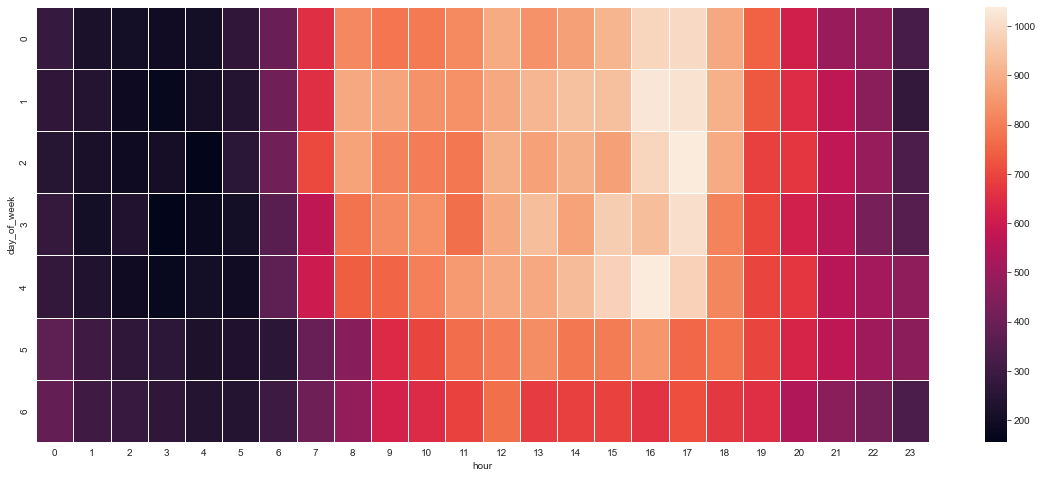

In [920]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(heat,ax=ax,linewidths=0.5)


#### day of the week lets name it for better understanding

In [921]:
new_df.groupby(by=['Day','hour']).count()['Reasons'].unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,818,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thr,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


In [922]:
heat = new_df.groupby(by=['Day','hour']).count()['Reasons'].unstack()

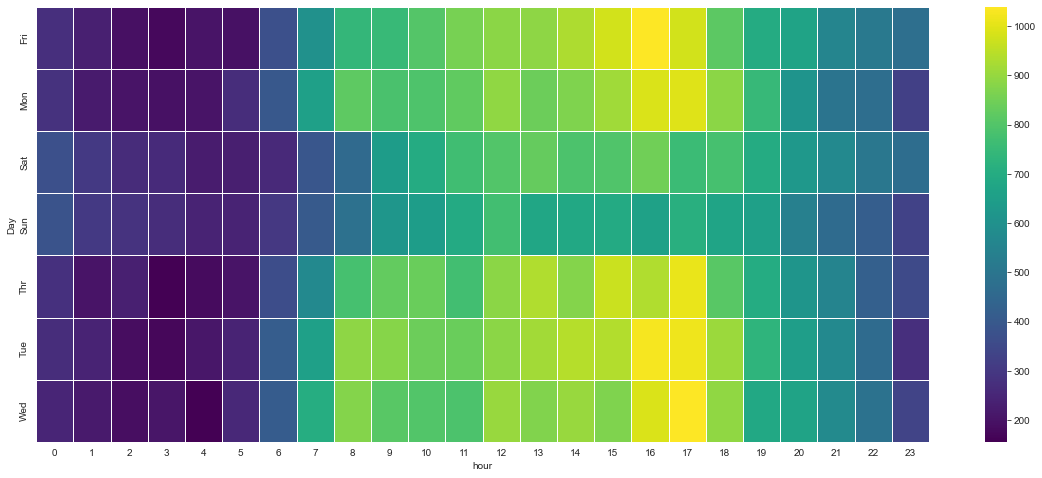

In [923]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(heat,ax=ax,linewidths=0.5,cmap='viridis')

#### this is much much better representation, here we see that on weekends even during hours 0-5 theres some activities in 911 calls
#### then we have the higest during Friday and hour 16-17 followed by Tuesday and Thrusday of same hour which is suprising, seems like they are traffic related calls as we saw earlier

In [924]:
new_df.groupby(by=['month_name','Day','hour']).count()['Reasons'].unstack().unstack()

hour        0                           1           ...  22           23      \
Day        Fri Mon Sat Sun Thr Tue Wed Fri Mon Sat  ... Thr Tue  Wed Fri Mon   
month_name                                          ...                        
Apr         46  34  42  44  28  23  24  37  27  42  ...  37  31   49  56  24   
Aug         29  30  43  30  21  35  31  18  16  29  ...  43  37   32  57  39   
Dec         16  24  13  40  27  12  18  12  21  10  ...  40  48   48  21  36   
Feb         22  47  39  52  44  35  28  22  28  37  ...  35  49  114  59  52   
Jan         39  44  60  48  37  29  37  33  23  54  ...  46  74   31  79  45   
Jul         45  29  43  45  24  31  24  35  30  32  ...  47  48   47  47  31   
Jun         28  27  42  39  32  35  25  20  21  27  ...  72  61   71  52  31   
Mar         30  22  35  29  37  32  29  23  23  36  ...  57  53   48  48  28   
May         20  25  56  56  28  37  33  35  31  34  ...  47  61   50  55  39   

hour                            
Day        Sat Sun Thr Tue Wed  
month_name                      
Apr         82  39  34  23  24  
Aug         39  18  34  28  32  
Dec         39  25  38  21  24  
Feb         47  30  41  27  71  
Jan         66  39  46  43  26  
Jul         56  59  33  21  45  
Jun         43  35  60  41  44  
Mar         39  36  41  39  42  
May         56  49  27  31  26  

[9 rows x 168 columns]

In [925]:
heat_2 = new_df.groupby(by=['month_name','Day','hour']).count()['Reasons'].unstack().unstack()

<AxesSubplot:xlabel='hour-Day', ylabel='month_name'>

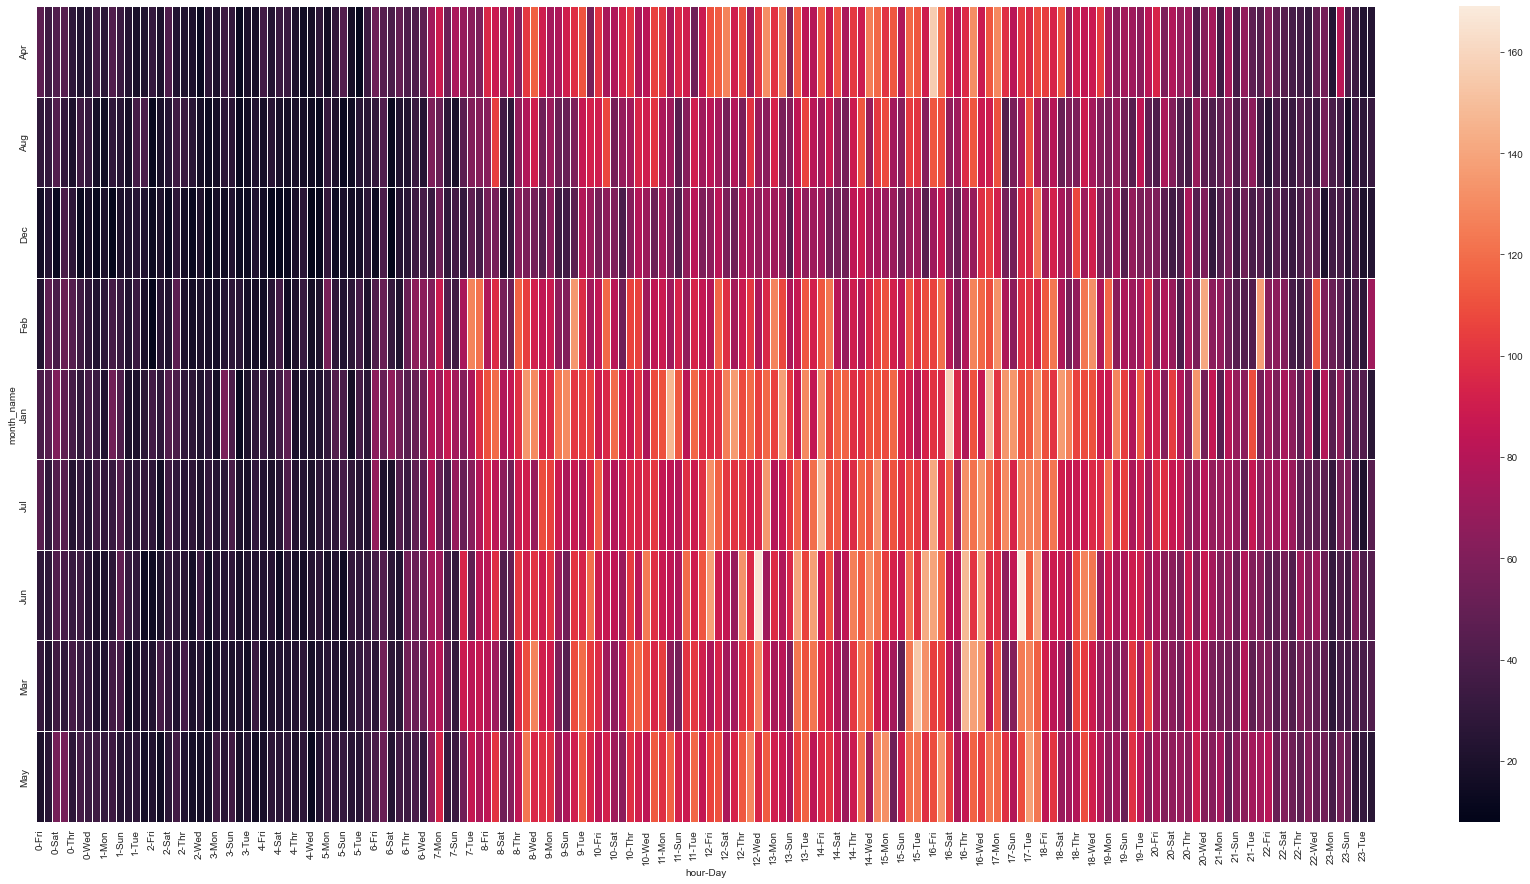

In [931]:
fig, ax = plt.subplots(figsize=(30,15))

sns.heatmap(heat_2,ax=ax,linewidths=0.5)


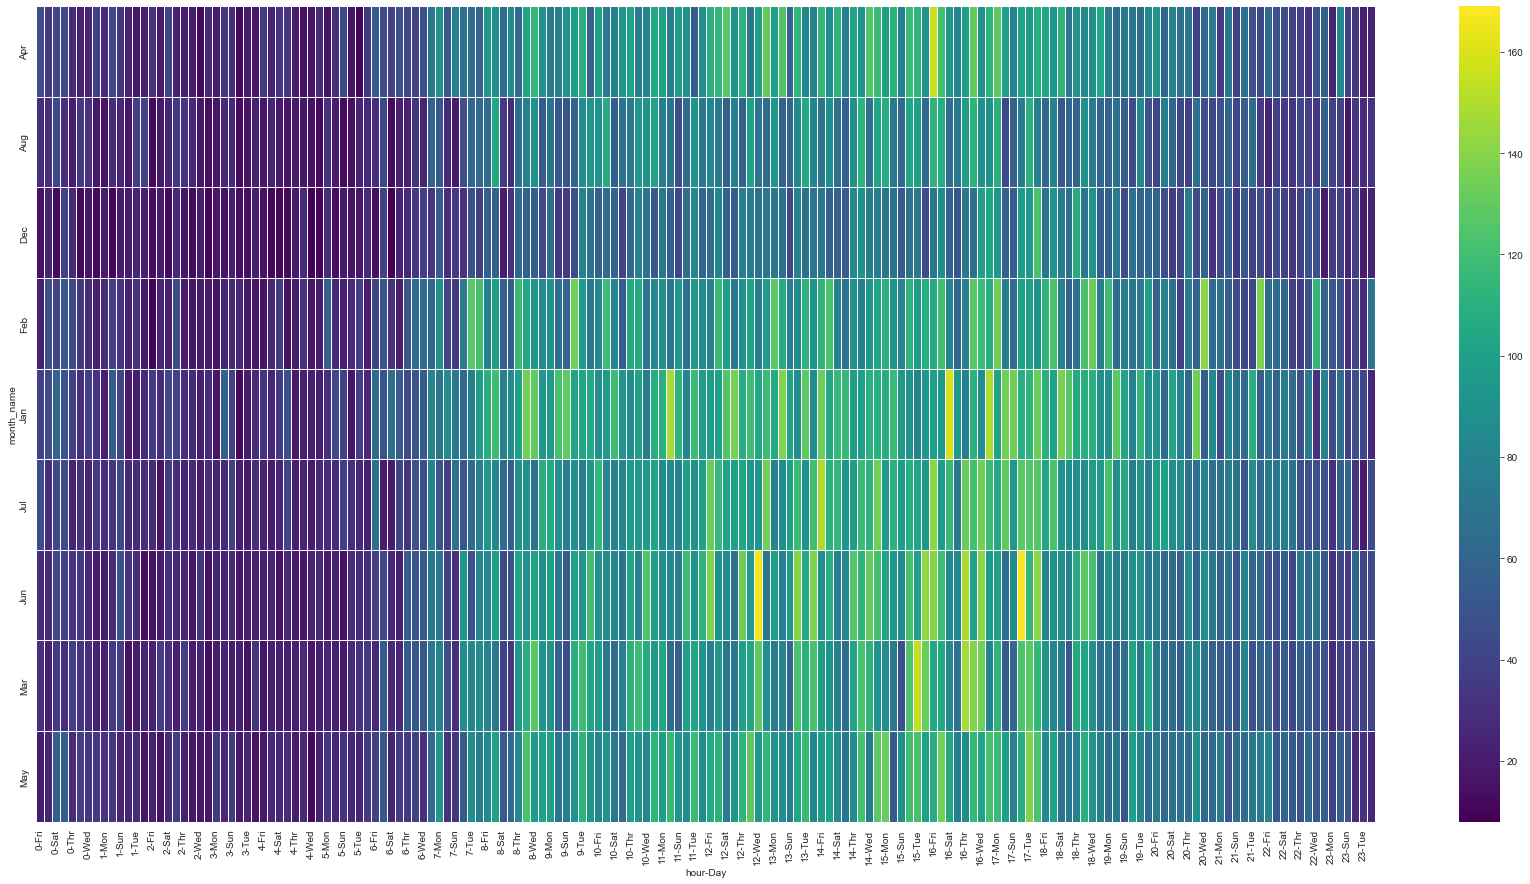

In [932]:
fig, ax = plt.subplots(figsize=(30,15))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis')


#### I prefer viridis but a lot of people like the default one, so here we do both
#### this is extremely detailed informative map to see which day and which month did we receive the highest calls, I love it

In [933]:

new_df.groupby(by=['Day','month_name']).count()['Reasons'].unstack()

#### lets just see month and day heatmap

month_name,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May
Day,,,,,,,,,
Fri,1958,1310,1064,1580,1970,2045,1649,1523,1730
Mon,1597,1509,1256,1964,1727,1692,1617,1533,1779
Sat,1732,1099,978,1440,2290,1695,1388,1264,1444
Sun,1488,1021,907,1229,1960,1672,1331,1100,1422
Thr,1601,1227,1265,1596,1584,1646,2064,1900,1590
Tue,1430,1612,1233,1753,1973,1668,1673,1884,1917
Wed,1517,1295,1260,1902,1699,1715,2054,1888,1538


In [934]:
heat_3 = new_df.groupby(by=['Day','month_name']).count()['Reasons'].unstack()


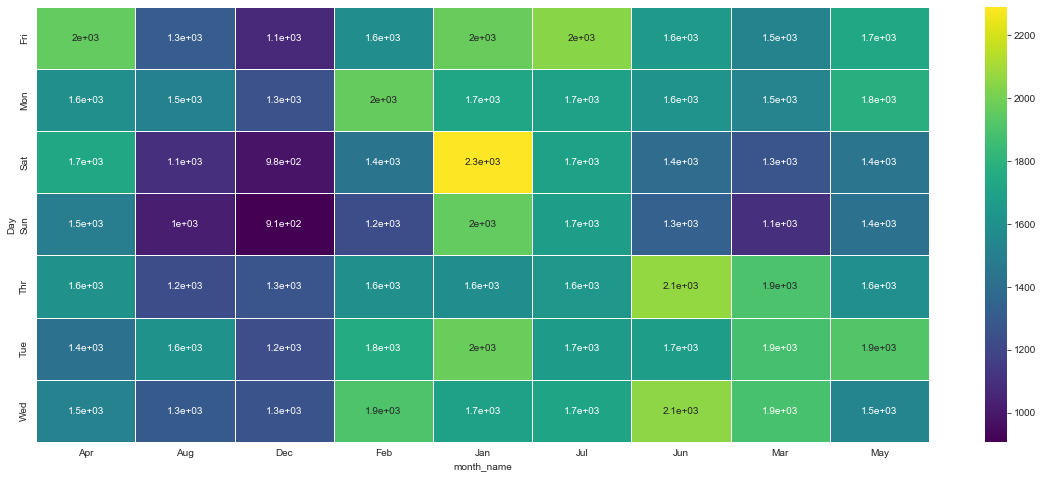

In [935]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(heat_3,ax=ax,linewidths=0.5,annot=True,cmap='viridis')


#### seems like Jan and Sat is highest number of calls we get 

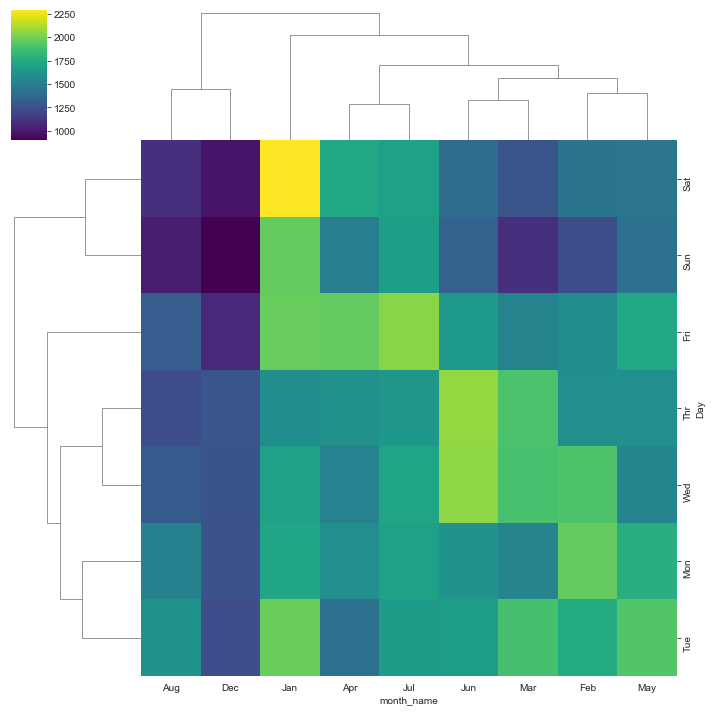

In [938]:

sns.clustermap(heat_3,cmap='viridis')                 #### I try to stay away from cluster map as I prefer heat map and draw my own conclusion but we have it if we need it



In [939]:
new_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons,Num_Reasons,hour,month,day_of_week,month_name,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,0,17,12,3,Dec,Thr,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,0,17,12,3,Dec,Thr,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,2,17,12,3,Dec,Thr,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,0,17,12,3,Dec,Thr,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19238.0,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,0,17,12,3,Dec,Thr,2015-12-10


In [940]:
new_df.addr.nunique()

21908

In [941]:
#############################################
############ Model - Classification
############################################

In [761]:
X = new_df.drop(columns=['desc','title','timeStamp','addr','Reasons','Num_Reasons','month_name','Day','Date'])

In [762]:
X.head()

,lat,lng,zip,twp,hour,month,day_of_week
0,40.297876,-75.581294,19525.0,NEW HANOVER,17,12,3
1,40.258061,-75.264680,19446.0,HATFIELD TOWNSHIP,17,12,3
2,40.121182,-75.351975,19401.0,NORRISTOWN,17,12,3
3,40.116153,-75.343513,19401.0,NORRISTOWN,17,12,3
4,40.251492,-75.603350,19238.0,LOWER POTTSGROVE,17,12,3


In [763]:
y = new_df['Reasons']

In [764]:
y.head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reasons, dtype: object

In [765]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [766]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['twp']),
                                               ('num', StandardScaler(),['lat','lng','zip','hour','month','day_of_week'])
                                              ]
                                )



In [767]:
from sklearn.pipeline import Pipeline

In [768]:
from sklearn.linear_model import LogisticRegression


In [769]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [770]:
from sklearn.model_selection import train_test_split


In [771]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [772]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['twp']),
                                                 ('num', StandardScaler(),
                                                  ['lat', 'lng', 'zip', 'hour',
                                                   'month', 'day_of_week'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [773]:
y_predict = model.predict(X_test)

In [774]:
from sklearn import metrics


In [775]:
metrics.accuracy_score(y_test,y_predict)             #### not bad for a very basic model

0.522473604826546

In [776]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         EMS       0.54      0.78      0.64     14545
        Fire       0.53      0.01      0.02      4518
     Traffic       0.48      0.39      0.43     10772

    accuracy                           0.52     29835
   macro avg       0.52      0.39      0.36     29835
weighted avg       0.52      0.52      0.47     29835



In [777]:
from sklearn.ensemble import RandomForestClassifier           #### lets bring the randomforest

In [778]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_jobs=-1,verbose=2))
])

In [779]:
%%time

model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.7s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['twp']),
                                                 ('num', StandardScaler(),
                                                  ['lat', 'lng', 'zip', 'hour',
                                                   'month', 'day_of_week'])])),
                ('classifier', RandomForestClassifier(n_jobs=-1, verbose=2))])

In [780]:
y_predict = model.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [781]:
print(metrics.classification_report(y_test,y_predict))            #### slightly better

              precision    recall  f1-score   support

         EMS       0.61      0.74      0.67     14545
        Fire       0.25      0.11      0.15      4518
     Traffic       0.59      0.57      0.58     10772

    accuracy                           0.58     29835
   macro avg       0.48      0.47      0.47     29835
weighted avg       0.55      0.58      0.56     29835



In [782]:
metrics.confusion_matrix(y_test,y_predict)

array([[10731,   921,  2893],
       [ 2670,   496,  1352],
       [ 4083,   587,  6102]], dtype=int64)

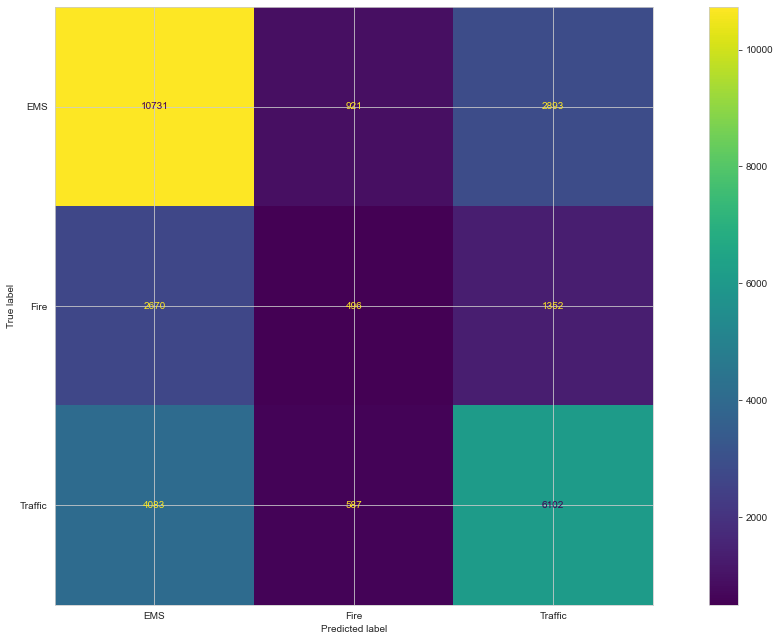

In [786]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['EMS','Fire','Traffic']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(20,11))

disp.plot(ax=ax)

#### not the best model because this dataset didn't have anything which had higher correlation,
#### I think the worst to predict is Fire which makes sense because those are in smaller numbers compared to others

In [626]:
y_test.value_counts()

EMS        14545
Traffic    10772
Fire        4518
Name: Reasons, dtype: int64

In [627]:
y_train.value_counts()

EMS        34307
Traffic    24920
Fire       10385
Name: Reasons, dtype: int64

In [628]:
from sklearn.model_selection import GridSearchCV


In [630]:
%%time

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

model_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=3)
model_grid.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.578 total time= 3.7min
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.578 total time= 3.7min
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.582 total time= 3.9min
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.579 total time= 3.8min
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.588 total time= 3.7min
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=1, classifier__min_samples_

[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.600 total time=  58.7s
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.600 total time= 1.9min
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.594 total time= 1.9min
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.599 total time= 1.9min
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.598 total time= 1.9min
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.603 total time=

[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.598 total time= 1.2min
[CV 5/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.605 total time= 1.2min
[CV 1/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.603 total time= 1.8min
[CV 2/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.593 total time= 1.8min
[CV 3/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.601 total time= 1.8min
[CV 4/5] END classifier__max_depth=None, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.597 total time=

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.558 total time=  24.7s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.548 total time=  24.7s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=300;, score=0.555 total time=  24.8s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.559 total time=   7.8s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.552 total time=   8.3s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.557 total time=   8.3s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.554 total time=   8.0s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.548 total time=   7.9s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=100;, score=0.554 total time=   7.8s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.559 total time=  15.9s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.548 total time=  15.6s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=2, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.557 total time=  15.6s
[CV 

[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.555 total time=  15.0s
[CV 4/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.548 total time=  14.8s
[CV 5/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=200;, score=0.554 total time=  14.6s
[CV 1/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.557 total time=  22.3s
[CV 2/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.549 total time=  22.5s
[CV 3/5] END classifier__max_depth=10, classifier__min_samples_leaf=4, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.554 total time=  22.7s
[CV 

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.600 total time= 1.6min
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.594 total time= 1.6min
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=300;, score=0.598 total time= 1.6min
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.599 total time=  27.2s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.588 total time=  26.9s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.596 total time=  26.0s
[

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.596 total time=  25.0s
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.588 total time=  25.7s
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=100;, score=0.592 total time=  24.8s
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.595 total time=  50.3s
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.588 total time=  52.0s
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=2, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.595 total time=  50.3

[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.591 total time= 1.3min
[CV 4/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.585 total time= 1.3min
[CV 5/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=200;, score=0.593 total time= 1.3min
[CV 1/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.594 total time= 2.0min
[CV 2/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.584 total time= 2.0min
[CV 3/5] END classifier__max_depth=20, classifier__min_samples_leaf=4, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.593 total time= 2.0mi

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.604 total time= 2.1min
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.603 total time= 2.1min
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__n_estimators=300;, score=0.606 total time= 2.1min
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.605 total time=  49.2s
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.595 total time=  50.2s
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=2, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.599 total time=  49.5s
[

[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.598 total time=  33.7s
[CV 4/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.596 total time=  33.1s
[CV 5/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.601 total time=  33.3s
[CV 1/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.602 total time= 1.1min
[CV 2/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.589 total time= 1.1min
[CV 3/5] END classifier__max_depth=30, classifier__min_samples_leaf=4, classifier__min_samples_split=2, classifier__n_estimators=200;, score=0.599 total time= 1.2min
[CV 

In [631]:
best_model = model_grid.best_estimator_

In [632]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['twp']),
                                                 ('num', StandardScaler(),
                                                  ['lat', 'lng', 'zip', 'hour',
                                                   'month', 'day_of_week'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_split=10,
                                        n_estimators=300))])

In [633]:
y_predict = best_model.predict(X_test)

In [634]:
metrics.accuracy_score(y_test,y_predict)               #### went from 0.58 to 0.604 accuracy but now our recall for Fire has deteriorated

0.6045919222389811

In [635]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         EMS       0.60      0.82      0.70     14545
        Fire       0.41      0.03      0.06      4518
     Traffic       0.61      0.56      0.58     10772

    accuracy                           0.60     29835
   macro avg       0.54      0.47      0.45     29835
weighted avg       0.58      0.60      0.56     29835



In [636]:
from sklearn.neighbors import KNeighborsClassifier

In [637]:
%%time

k_range = range(1,100)

accuracy = []

for i in k_range:
    
    model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=i))
    ]) 
    
    model.fit(X_train,y_train)
    
    y_predict = model.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_predict))

Wall time: 3h 59min 47s


Text(0, 0.5, 'Accuracy')

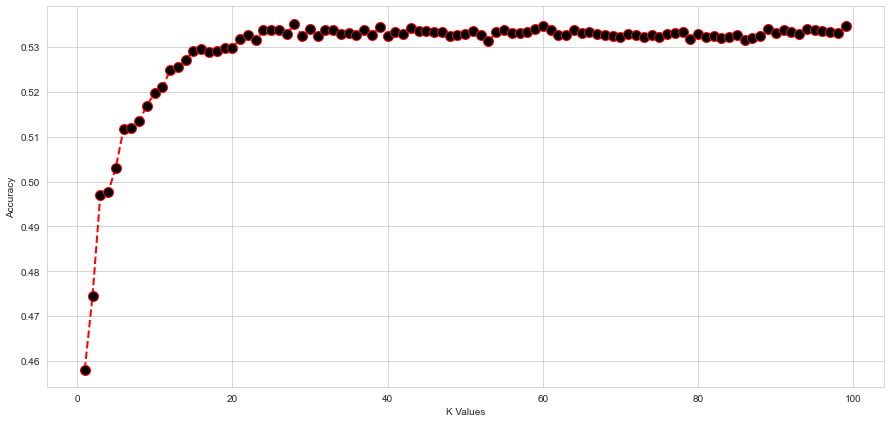

In [638]:
plt.figure(figsize=(15,7))

plt.plot(k_range,accuracy,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=10,markerfacecolor='black')

plt.xlabel('K Values')

plt.ylabel('Accuracy')


#### seems like the accuracy does go up when we increase the k value in KNN, the most ideal being k22 - k30
#### but still its no where close to the accuracy we got from gridsearch + randomforest

In [ ]:
########################################################################################################################
############ We decided to conclude the modeling process as the improvement in accuracy has plateaued at 0.605.  #######
############ Although we considered exploring more advanced modeling techniques, our current computing resources #######
############ are not sufficient to efficiently handle 100,000 data points with these methods.  #########################
########### The GridSearchCV took over 12 hours to complete, highlighting the limitations of our computing power. ######
########### Therefore, we have chosen to halt further exploration for now.    ##########################################
########################################################################################################################
